In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from time import time

from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#-------------------------------------

In [10]:
# loading the data
data = pd.read_csv('Spellman.csv')

In [11]:
# overview of the size of the data
data.shape

(4381, 24)

In [12]:
# overview of the data
data

,time,40,50,60,70,80,90,100,110,120,...,170,180,190,200,210,220,230,240,250,260
0,YAL001C,-0.070,-0.23,-0.100,0.03,-0.04,-0.12,-0.28,-0.44,-0.09,...,0.59,0.34,-0.28,-0.09,-0.44,0.31,0.03,0.57,0.00,0.010
1,YAL014C,0.215,0.09,0.025,-0.04,-0.04,-0.02,-0.51,-0.08,0.00,...,-0.30,-0.38,0.07,-0.04,0.13,-0.06,-0.26,-0.10,0.27,0.235
2,YAL016W,0.150,0.15,0.220,0.29,-0.10,0.15,-0.73,0.19,-0.15,...,0.12,-0.17,0.11,-0.15,0.03,-0.26,-0.34,-0.34,0.25,0.190
3,YAL020C,-0.350,-0.28,-0.215,-0.15,0.16,-0.12,0.26,0.00,0.13,...,0.07,0.61,-0.20,0.49,-0.43,0.80,-0.47,1.01,-0.36,-0.405
4,YAL022C,-0.415,-0.59,-0.580,-0.57,-0.09,-0.34,0.49,0.32,1.15,...,-0.48,-0.40,-0.59,0.54,-0.09,1.03,0.08,0.57,-0.26,-0.310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4376,YPR198W,-0.060,0.08,0.210,0.34,0.65,-0.26,0.14,-0.33,0.53,...,0.14,-0.64,-0.26,0.53,-0.17,0.59,-0.96,0.40,-0.23,-0.325
4377,YPR199C,0.155,0.19,0.235,0.28,-0.26,0.21,-0.40,0.34,-0.80,...,0.34,0.15,0.30,-0.06,0.13,-0.44,-1.03,0.14,0.30,0.250
4378,YPR201W,-0.255,-0.36,-0.300,-0.24,1.30,-0.07,0.29,-0.20,0.25,...,-0.81,0.89,0.07,1.04,-0.32,0.80,-0.13,0.84,-0.39,-0.415
4379,YPR203W,0.570,0.12,-0.070,-0.26,-0.44,-0.21,-1.08,0.39,-0.17,...,0.12,-0.96,-0.31,-0.81,-0.34,-1.21,-1.36,-0.12,0.69,0.555


In [13]:
# checking the data types and column types
data.columns

Index(['time', '40', '50', '60', '70', '80', '90', '100', '110', '120', '130',
       '140', '150', '160', '170', '180', '190', '200', '210', '220', '230',
       '240', '250', '260'],
      dtype='object')

In [19]:
# checking no null values
data.isnull().sum()

time    0
40      0
50      0
60      0
70      0
80      0
90      0
100     0
110     0
120     0
130     0
140     0
150     0
160     0
170     0
180     0
190     0
200     0
210     0
220     0
230     0
240     0
250     0
260     0
dtype: int64

In [24]:
data.describe()

,40,50,60,70,80,90,100,110,120,130,...,170,180,190,200,210,220,230,240,250,260
count,4381.000000,4381.000000,4381.000000,4381.000000,4381.000000,4381.000000,4381.000000,4381.000000,4381.000000,4381.000000,...,4381.000000,4381.000000,4381.000000,4381.000000,4381.000000,4381.000000,4381.000000,4381.000000,4381.000000,4381.000000
mean,0.007301,-0.007348,0.003192,0.013732,-0.010367,-0.030854,0.027231,0.013716,-0.078443,0.056136,...,0.061164,0.022353,-0.033415,-0.021036,-0.025040,0.023294,-0.037893,0.118674,0.016622,-0.012365
std,0.466731,0.478514,0.361053,0.399159,0.424641,0.425090,0.414527,0.380423,0.483079,0.374063,...,0.343563,0.472254,0.360631,0.429095,0.346815,0.482878,0.503479,0.496157,0.458676,0.393974
min,-3.295000,-3.960000,-2.440000,-3.730000,-2.450000,-3.600000,-2.420000,-4.080000,-2.500000,-4.120000,...,-3.780000,-2.200000,-4.630000,-2.600000,-2.460000,-1.790000,-2.010000,-1.840000,-3.420000,-2.250000
25%,-0.210000,-0.230000,-0.175000,-0.180000,-0.250000,-0.250000,-0.210000,-0.160000,-0.360000,-0.120000,...,-0.120000,-0.270000,-0.220000,-0.270000,-0.210000,-0.290000,-0.350000,-0.190000,-0.260000,-0.265000
50%,0.035000,0.020000,0.030000,0.030000,0.010000,0.010000,0.030000,0.050000,-0.100000,0.070000,...,0.060000,0.030000,0.000000,0.000000,0.000000,0.030000,-0.010000,0.120000,0.000000,-0.040000
75%,0.270000,0.260000,0.220000,0.230000,0.250000,0.230000,0.260000,0.220000,0.180000,0.260000,...,0.240000,0.320000,0.190000,0.240000,0.180000,0.340000,0.300000,0.440000,0.280000,0.210000
max,1.930000,2.060000,1.805000,1.770000,1.880000,4.140000,2.400000,2.760000,3.060000,2.380000,...,1.950000,2.780000,1.410000,3.010000,2.250000,2.480000,1.960000,2.350000,2.450000,2.640000


In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.iloc[:, 1:])

# Initialize PCA
pca = PCA(n_components=2)

# Fit and transform the data
X_pca = pca.fit_transform(X_scaled)

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Print singular values
print("Singular values:", pca.singular_values_)

Explained variance ratio: [0.26827055 0.15645566]
Singular values: [164.41333572 125.55851856]


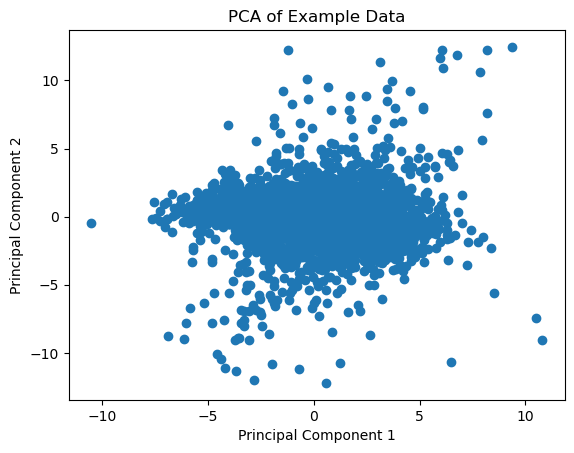

In [49]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Example Data')
plt.show()

In [35]:
kmeans = KMeans(n_clusters=23, random_state=0, n_init="auto").fit(data.iloc[:, [1,22]])

In [36]:
kmeans.labels_

array([ 4, 19,  4, ..., 21, 16, 16], shape=(4381,), dtype=int32)

In [37]:
kmeans.cluster_centers_

array([[ 0.04876923,  0.80992308],
       [-0.02955435, -0.1893913 ],
       [-0.64078231, -0.44163265],
       [-1.07746154,  0.64846154],
       [ 0.08060904,  0.07992141],
       [ 0.37870968,  0.0826129 ],
       [-0.03143443, -0.93270492],
       [ 0.7433125 , -0.475875  ],
       [ 1.3078889 ,  0.46444444],
       [-2.20136364,  0.38136364],
       [-0.61388889,  1.56444444],
       [-0.03333334, -2.14133333],
       [-0.12201201,  0.32702703],
       [ 0.12955253, -0.48058366],
       [ 0.7715407 ,  0.10523256],
       [-0.41239286,  0.71814286],
       [ 0.61783505,  0.7214433 ],
       [ 0.3327    , -0.20883333],
       [-1.44479167, -0.28229167],
       [ 0.28179144,  0.39390374],
       [-0.32152542, -0.06355932],
       [-0.24809352, -0.50564748],
       [-0.67130137,  0.16226027]])

In [38]:
ax = plt.gca()
for column in ['colA', 'colB', 'colC', 'colD']:
    df.plot(kind='scatter', x='colA', y=column, ax=ax)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'scater'

In [47]:
data.iloc[:, 1:].columns

Index(['40', '50', '60', '70', '80', '90', '100', '110', '120', '130', '140',
       '150', '160', '170', '180', '190', '200', '210', '220', '230', '240',
       '250', '260'],
      dtype='object')

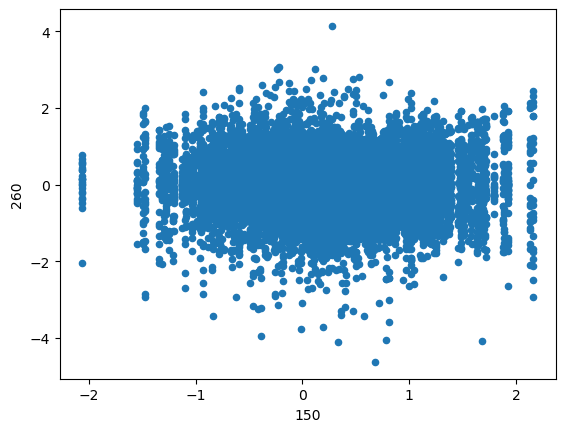

In [55]:
ax = plt.gca()
for column in data.iloc[:, 1:].columns:
    data.plot(kind='scatter', x='150', y=column, ax=ax)
plt.show()